# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement-2 CART_RF_ANN

<font color=darkblue>An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Attribute Information: 
<font color=darkblue>
    
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)
</font> 
    

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.1	Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook',palette='Spectral',style='darkgrid',font_scale = 1.5,color_codes=True)


# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# To perform Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# To perform Randon Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# To perform Multilayer Perceptron classifier [ANN]
from sklearn.neural_network import MLPClassifier

# Model Performance measures
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_curve

# To perform Gridsearch to get best parameter values:
from sklearn.model_selection import GridSearchCV

In [2]:
# Read Data
claim_df = pd.read_csv('insurance_part2_data.csv')

In [3]:
# Check head of the data
claim_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
# Data Inspection (Dimension)
row, col = claim_df.shape
print("There are total {}".format(row), "Observations and {}".format(col), "variables in the dataset")

There are total 3000 Observations and 10 variables in the dataset


In [5]:
# Data Structure
claim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


* **Claimed is the target variable while all others are the predictors.**  
* **Out of the 10 columns, 6 are object type, while remaining 2 are int and 2 are float.<br>**
<b>Object</b> Agency_Code, Type, Claimed, Channel, Product Name and Destination.<br>
<b>Int</b> Age and Duration.<br>
<b>Float</b> Commision and Sales.<br>

* **Nominal variables are 6:**<br> 
Agency_Code, Type, Claimed, Channel,Product Name and Destination.<br>
* **Numeric variables are 4:**<br>
Age, Duration, Commision and Sales.

* **Many columns are of type object i.e. strings. These need to be converted to ordinal type**
* **Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.**

In [6]:
# Number Summary
claim_df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [7]:
# Check for Missing Values
claim_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

* **There are no missing values found for a given Insurance customer dataset.** 

In [8]:
dups = claim_df.duplicated()
print('Number of duplicate rows =%d'% dups.sum())
claim_df[dups]

Number of duplicate rows =139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


**Since there is no unique identifier, we do not remove duplicate records for a given dataset**

## Univariate Analysis

In [9]:
# Geting unique counts of all Nominal Variables
for column in claim_df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    print(column.upper(),': ',claim_df[column].nunique())
    print(claim_df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




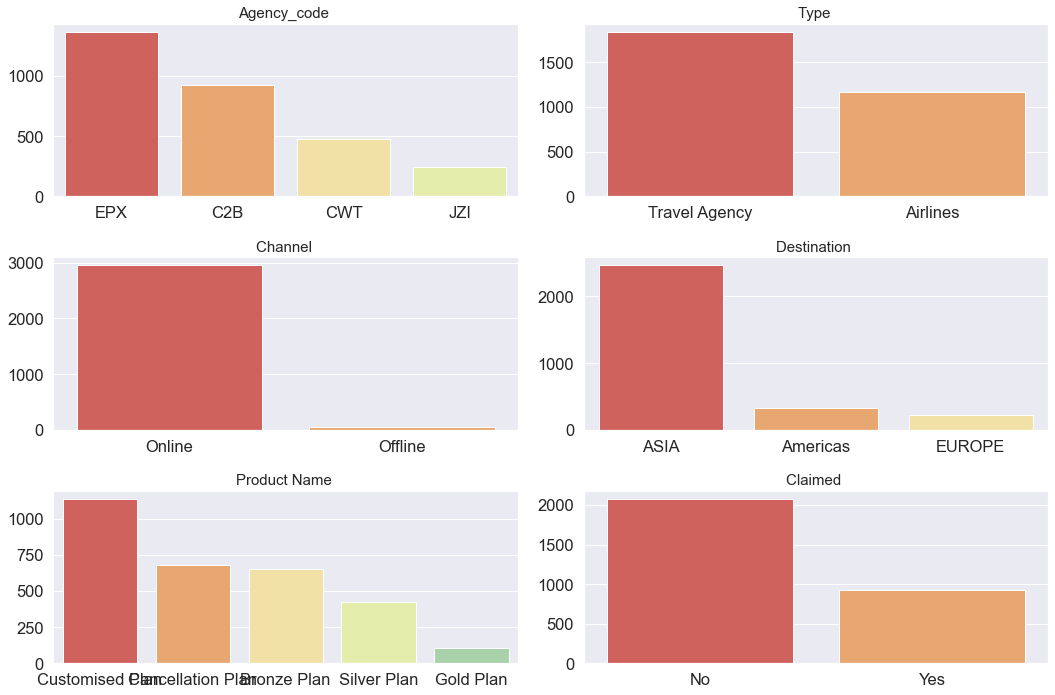

In [10]:
## Plot the Class count for each Nominal variable
## construct barplot for Nominal variables:

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 10)

a = sns.barplot(claim_df.Agency_Code.value_counts().index,claim_df.Agency_Code.value_counts().values , ax=axes[0][0])
a.set_title("Agency_code ",fontsize=15)

a = sns.barplot(claim_df.Type.value_counts().index,claim_df.Type.value_counts().values , ax=axes[0][1])
a.set_title("Type ",fontsize=15)

a = sns.barplot(claim_df.Channel.value_counts().index,claim_df.Channel.value_counts().values , ax=axes[1][0])
a.set_title("Channel ",fontsize=15)

a = sns.barplot(claim_df.Destination.value_counts().index,claim_df.Destination.value_counts().values , ax=axes[1][1])
a.set_title("Destination ",fontsize=15)

a = sns.barplot(claim_df['Product Name'].value_counts().index,claim_df['Product Name'].value_counts().values , ax=axes[2][0])
a.set_title("Product Name ",fontsize=15)

a = sns.barplot(claim_df.Claimed.value_counts().index,claim_df.Claimed.value_counts().values , ax=axes[2][1])
a.set_title("Claimed ",fontsize=15)

plt.tight_layout()
plt.show()

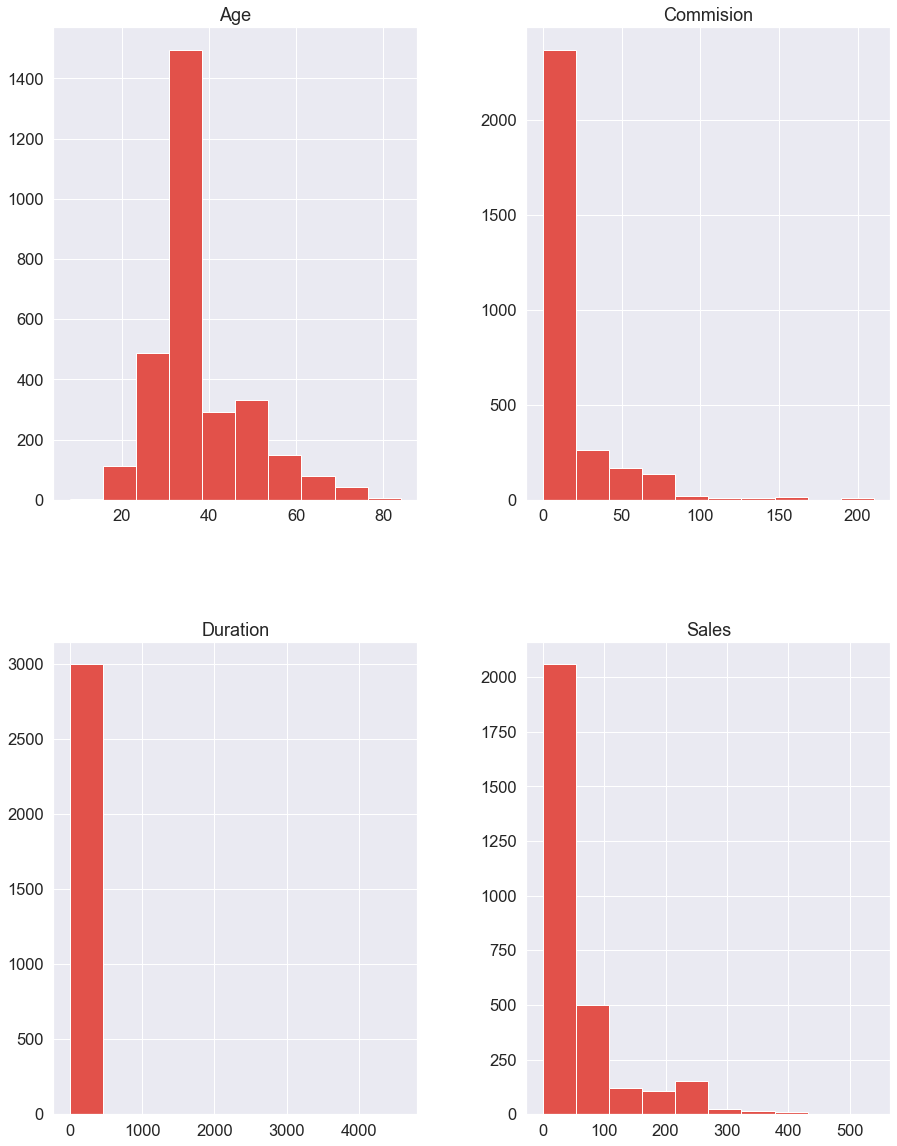

In [11]:
#checking distributions using histograms
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
claim_df.hist(ax=ax)
ax.set_title('Histogram')
plt.show()

<AxesSubplot:xlabel='Duration'>

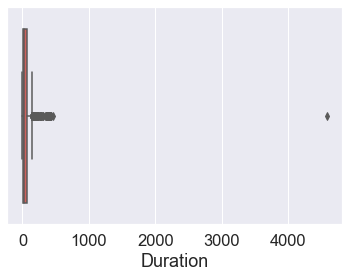

In [12]:
sns.boxplot(claim_df['Duration'])

In [13]:
claim_df = claim_df[claim_df.Duration != -1]
claim_df = claim_df[claim_df.Duration != 4580]

**Duration has lot of outliers. Two records with value as “-1” and “4580” seems to be incorrect and hence the same was dropped from the dataset.**

**There are outliers in all the variables. Random Forest and ANN can handle the outliers. 
Hence, Outliers are not treated and we will keep the data as it is.** 

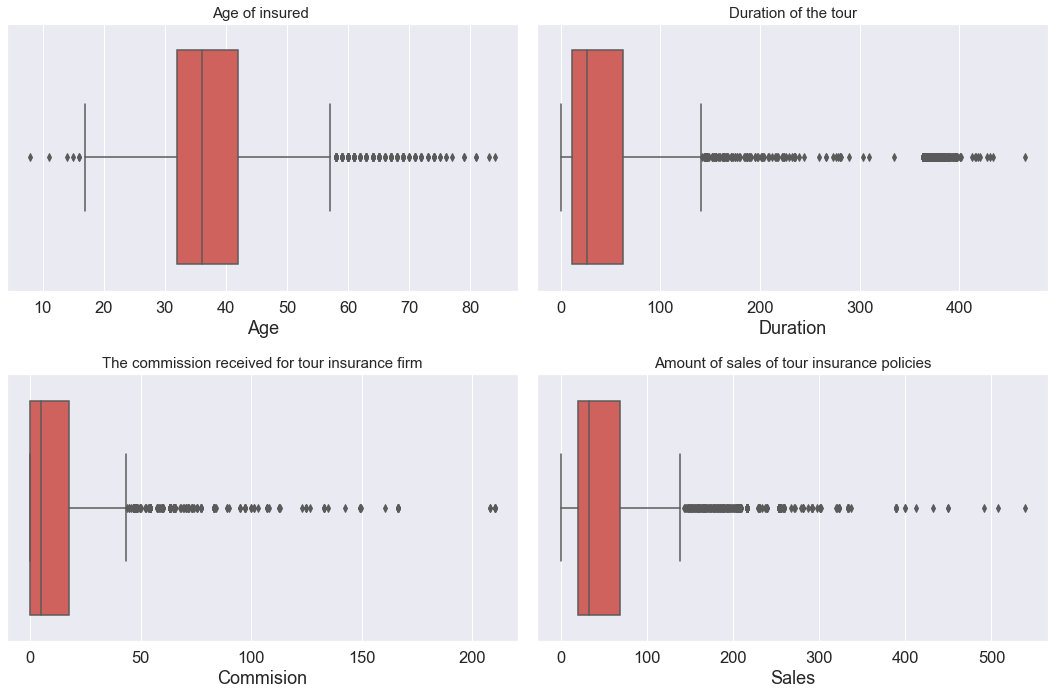

In [14]:
# construct box plot for continuous variables:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)

a = sns.boxplot(claim_df['Age'] , ax=axes[0][0])
a.set_title("Age of insured ",fontsize=15)

a = sns.boxplot(claim_df['Duration'] , ax=axes[0][1])
a.set_title("Duration of the tour",fontsize=15)

a = sns.boxplot(claim_df['Commision'] , ax=axes[1][0])
a.set_title("The commission received for tour insurance firm",fontsize=15)

a = sns.boxplot(claim_df['Sales'] , ax=axes[1][1])
a.set_title("Amount of sales of tour insurance policies",fontsize=15)

plt.tight_layout()
plt.show()


## Multivariate Analysis

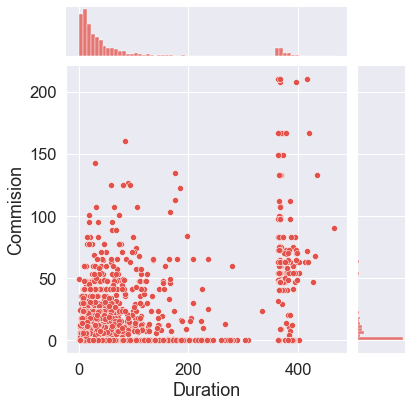

In [15]:
sns.jointplot(claim_df['Duration'],claim_df['Commision'])
plt.show()

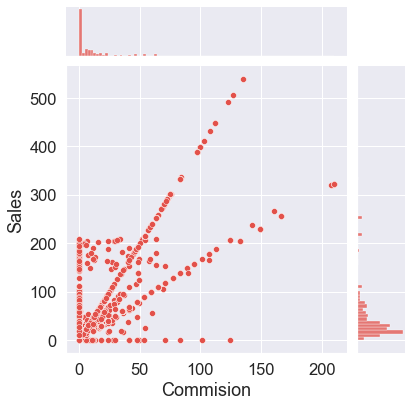

In [16]:
sns.jointplot(claim_df['Commision'],claim_df['Sales'])
plt.show()

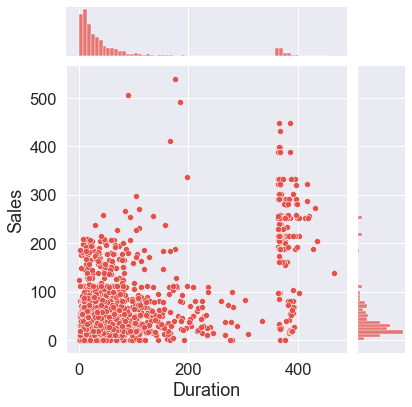

In [17]:
sns.jointplot(claim_df['Duration'],claim_df['Sales'])
plt.show()

<AxesSubplot:>

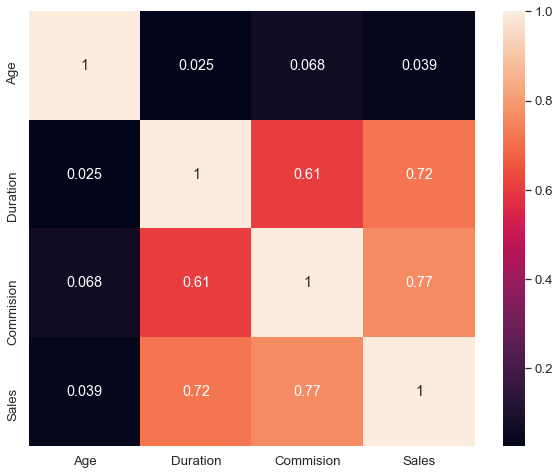

In [18]:
## Checking for Correlations
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(claim_df[['Age','Duration','Commision','Sales']].corr(), annot=True)

* **From the above plot we can see that there are no negative values found for continuous variables.**
* **Commission and Sales have a better correlation.**
* **Age and duration have a very low correlation.**


## Converting all objects to categorical codes

In [19]:
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in claim_df.columns: 
    if claim_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(claim_df[feature].unique()))
        print(pd.Categorical(claim_df[feature].unique()).codes)
        claim_df[feature] = pd.Categorical(claim_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [20]:
# Data Structure
claim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2998 non-null   int64  
 1   Agency_Code   2998 non-null   int8   
 2   Type          2998 non-null   int8   
 3   Claimed       2998 non-null   int8   
 4   Commision     2998 non-null   float64
 5   Channel       2998 non-null   int8   
 6   Duration      2998 non-null   int64  
 7   Sales         2998 non-null   float64
 8   Product Name  2998 non-null   int8   
 9   Destination   2998 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 134.7 KB


In [21]:
# Number Summary
round(claim_df.describe(),3)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,38.092,1.306,0.613,0.308,14.537,0.985,68.521,60.284,1.662,0.250
std,10.463,0.994,0.487,0.462,25.488,0.123,105.790,70.745,1.259,0.575
min,8.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,32.000,0.000,0.000,0.000,0.000,1.000,11.000,20.000,1.000,0.000
50%,36.000,2.000,1.000,0.000,4.630,1.000,26.500,33.000,2.000,0.000
75%,42.000,2.000,1.000,1.000,17.245,1.000,63.000,69.000,2.000,0.000
max,84.000,3.000,1.000,1.000,210.210,1.000,466.000,539.000,4.000,2.000


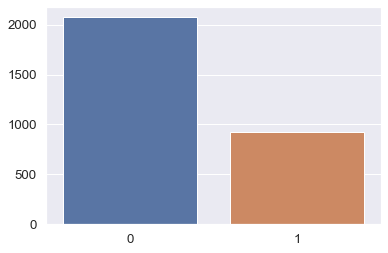

0    0.691795
1    0.308205
Name: Claimed, dtype: float64


In [22]:
## Plot the Class count in Target variable
## Also print the % of each class in the Target variable
## Proportion of 1s and 0s
sns.barplot(claim_df.Claimed.value_counts().index,claim_df.Claimed.value_counts().values)
plt.show()
print(claim_df.Claimed.value_counts(normalize=True))

**There is no issue of class imbalance here as we have reasonable proportions in both the classes.**

### Min-Max Scaling¶ or z- Transformation

* **Decision tree, Random forest and Neural networks can handle outliers, hence outlier treatment is not necessary, even if did will not have much impact or difference on any of the 3 models.**
* **From the dataset we can see the features are on different scale and are of different magnitudes**
* **Scaling is not required for decision tree and random forest, but for artificial neural networks scaling is required.**


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.2	Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [23]:
# capture the target column ("Claimed") into separate vectors for training set and test set

X = claim_df.drop("Claimed" , axis=1) # Independent Variables

y = claim_df.pop("Claimed") # Dependent Variable

In [24]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [25]:
## Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2098, 9)
X_test (900, 9)
train_labels (2098,)
test_labels (900,)


# Model Building

## CART-Decision Tree

In [26]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [27]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [28]:
train_char_label = ['No','Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model,out_file=Credit_Tree_File,
                               feature_names= list(X_train),
                               class_names= list(train_char_label))
Credit_Tree_File.close()

In [29]:
# imortance of features in the tree building ( The importance of a features is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini Importance )
print (pd.DataFrame(dt_model.feature_importances_,columns = ["Imp"],
                   index = X_train.columns))

                   Imp
Age           0.191586
Agency_Code   0.188191
Type          0.000000
Commision     0.081107
Channel       0.005195
Duration      0.253331
Sales         0.220419
Product Name  0.039627
Destination   0.020544


In [30]:
y_predict_dt = dt_model.predict(X_train)
y_predict_dt = dt_model.predict(X_test)

## Regularising the Decision Tree

In [31]:
reg_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7,
                                     min_samples_leaf=10,
                                     min_samples_split=30)
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [32]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model,out_file=credit_tree_regularized,
                               feature_names= list(X_train),
                               class_names= list(train_char_label))
credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_,columns = ["Imp"],
                   index = X_train.columns))

                   Imp
Age           0.191586
Agency_Code   0.188191
Type          0.000000
Commision     0.081107
Channel       0.005195
Duration      0.253331
Sales         0.220419
Product Name  0.039627
Destination   0.020544


In [33]:
## Predicting on Training and Test dataset
ytrain_predict_dtcl = reg_dt_model.predict(X_train)
ytest_predict_dtcl = reg_dt_model.predict(X_test)

# Building a Random Forest Classifier

In [34]:
rfcl =RandomForestClassifier(n_estimators = 501,random_state=1)
rfcl = rfcl.fit(X_train,train_labels)

### Grid Search for finding out the optimal values for the hyper parameters

In [35]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4,6],
    'min_samples_leaf': [50,100],
    'min_samples_split': [150,300],
    'n_estimators': [301,501] 
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [36]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid_rfcl = grid_search.best_estimator_
best_grid_rfcl

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 150, 'n_estimators': 301}


RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=301)

In [37]:
## Predicting the Training and Testing data
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

# Building a Neural Network Classifier

* **For neural network scaling is required, it may cause large error gradient values weight values to change dramatically.**

In [38]:
# Z-transformation:
sc = StandardScaler()
Scaled_X_train = sc.fit_transform(X_train)
Scaled_X_train

array([[-0.96916029, -1.32465328, -1.26992219, ...,  0.27941814,
         1.85604898, -0.43750626],
       [-1.84403166, -1.32465328, -1.26992219, ..., -0.64456154,
        -1.33574673, -0.43750626],
       [-0.19149684,  0.69579207,  0.78744982, ..., -0.57508938,
         0.26015113, -0.43750626],
       ...,
       [-0.19149684,  0.69579207,  0.78744982, ...,  0.02237116,
         0.26015113, -0.43750626],
       [ 0.5861666 ,  1.70601475, -1.26992219, ..., -0.60287825,
        -1.33574673, -0.43750626],
       [-0.19149684, -1.32465328, -1.26992219, ..., -0.5403533 ,
         1.85604898, -0.43750626]])

In [39]:
Scaled_X_test = sc.transform(X_test)
Scaled_X_test

array([[ 3.01636486e+00, -3.14430605e-01,  7.87449821e-01, ...,
        -4.50039502e-01,  2.60151128e-01, -4.37506257e-01],
       [-4.83120634e-01, -1.32465328e+00, -1.26992219e+00, ...,
        -1.92992524e-01,  1.85604898e+00, -4.37506257e-01],
       [-6.77536495e-01,  6.95792074e-01,  7.87449821e-01, ...,
        -5.75089383e-01,  2.60151128e-01, -4.37506257e-01],
       ...,
       [-1.91496843e-01,  6.95792074e-01,  7.87449821e-01, ...,
        -6.44561539e-01, -5.37797799e-01, -4.37506257e-01],
       [ 1.94707763e+00, -1.32465328e+00, -1.26992219e+00, ...,
        -6.30667108e-01, -1.33574673e+00, -4.37506257e-01],
       [ 2.91901793e-03, -3.14430605e-01,  7.87449821e-01, ...,
        -1.99939740e-01,  1.85604898e+00,  3.00027699e+00]])

In [40]:
best_grid_mlp =MLPClassifier(hidden_layer_sizes=100,max_iter=5000,
                  solver='sgd',verbose=True,random_state=21,tol=0.01)

In [41]:
best_grid_mlp.fit(Scaled_X_train, train_labels)

Iteration 1, loss = 0.63549068
Iteration 2, loss = 0.61864434
Iteration 3, loss = 0.59905822
Iteration 4, loss = 0.58197254
Iteration 5, loss = 0.56762328
Iteration 6, loss = 0.55587602
Iteration 7, loss = 0.54617908
Iteration 8, loss = 0.53838457
Iteration 9, loss = 0.53180209
Iteration 10, loss = 0.52622668
Iteration 11, loss = 0.52140838
Iteration 12, loss = 0.51759958
Iteration 13, loss = 0.51381992
Iteration 14, loss = 0.51073636
Iteration 15, loss = 0.50806815
Iteration 16, loss = 0.50568498
Iteration 17, loss = 0.50371991
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [42]:
## Predicting the Training and Testing data
ytrain_predict_mlp = best_grid_mlp.predict(Scaled_X_train)
ytest_predict_mlp = best_grid_mlp.predict(Scaled_X_test)

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.3	Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.

## Model Evaluation - Decision tree

### Training Data -Decision Tree

Accuracy for DecisionTreeClassifier model on Training set is 
 0.81


Classification report for DecisionTreeClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.74      0.57      0.64       627

    accuracy                           0.81      2098
   macro avg       0.78      0.74      0.76      2098
weighted avg       0.80      0.81      0.80      2098



Confusion Matrix for DecisionTreeClassifier model on Training set is


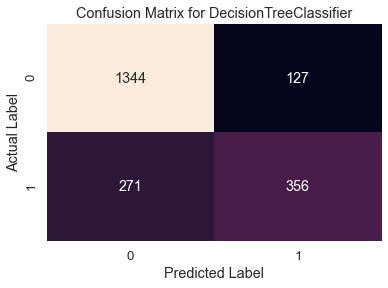

cart_train_precision  0.74
cart_train_recall  0.57
cart_train_f1  0.64


In [43]:
models_names={reg_dt_model:'DecisionTreeClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[reg_dt_model]),'\n',round(accuracy_score(train_labels,ytrain_predict_dtcl),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[reg_dt_model]),'\n',classification_report(train_labels,ytrain_predict_dtcl))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[reg_dt_model]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_dtcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[reg_dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

### AUC and ROC for the training data - DT

AUC: 0.861


Text(0.5, 1.0, 'ROC')

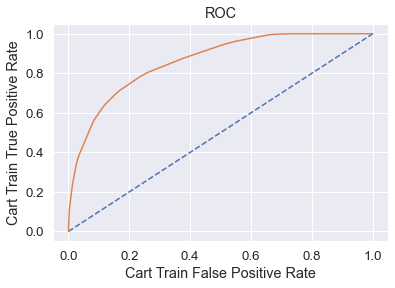

In [44]:
# predict probabilities
probs_dtcl = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_dtcl = probs_dtcl[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_dtcl)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_dtcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('Cart Train False Positive Rate')
plt.ylabel('Cart Train True Positive Rate')
plt.title('ROC')

In [45]:
#Train Data Accuracy
cart_train_acc=reg_dt_model.score(X_train,train_labels) 
round(cart_train_acc,3)

0.81

### Testing Data -Decision Tree

Accuracy for DecisionTreeClassifier model on Testing set is 
 0.751


Classification report for DecisionTreeClassifier model on Testing set is 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       603
           1       0.68      0.47      0.55       297

    accuracy                           0.75       900
   macro avg       0.73      0.68      0.69       900
weighted avg       0.74      0.75      0.74       900



Confusion Matrix for DecisionTreeClassifier model on Testing set is


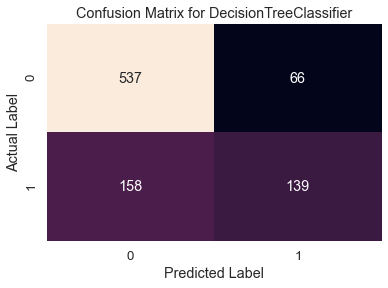

cart_test_precision  0.68
cart_test_recall  0.47
cart_test_f1  0.55


In [46]:
models_names={reg_dt_model:'DecisionTreeClassifier'}

print('Accuracy for {} model on Testing set is'.format(models_names[reg_dt_model]),'\n',round(accuracy_score(test_labels,ytest_predict_dtcl),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[reg_dt_model]),'\n',classification_report(test_labels,ytest_predict_dtcl))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[reg_dt_model]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_dtcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[reg_dt_model]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_f1=round(df.loc["1"][2],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_precision=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

### AUC and ROC for the test data

AUC: 0.791


Text(0.5, 1.0, 'ROC')

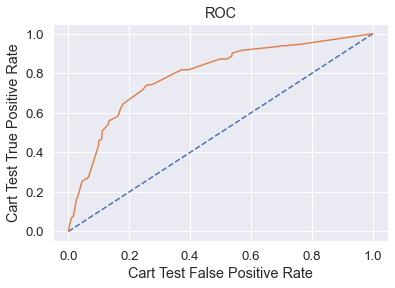

In [47]:
# predict probabilities
probs_dtcl = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dtcl = probs_dtcl[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_dtcl)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs_dtcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('Cart Test False Positive Rate')
plt.ylabel('Cart Test True Positive Rate')
plt.title('ROC')

In [48]:
#Train Data Accuracy
cart_test_acc=reg_dt_model.score(X_test,test_labels) 
round(cart_test_acc,3)

0.751

## Model Evaluation - Random Forest Classifier

### Training Data -Random Forest

Accuracy for RandomForestClassifier model on Training set is 
 0.791


Classification report for RandomForestClassifier model on Training set is 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       627

    accuracy                           0.79      2098
   macro avg       0.76      0.71      0.72      2098
weighted avg       0.78      0.79      0.78      2098



Confusion Matrix for RandomForestClassifier model on Training set is


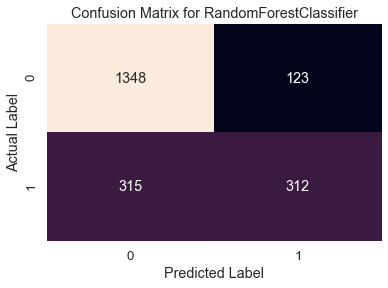

rfcl_train_precision  0.72
rfcl_train_recall  0.5
rfcl_train_f1  0.59


In [49]:
models_names={best_grid_rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Training set is'.format(models_names[best_grid_rfcl]),'\n',round(accuracy_score(train_labels,ytrain_predict_rfcl),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[best_grid_rfcl]),'\n',classification_report(train_labels,ytrain_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[best_grid_rfcl]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_rfcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[best_grid_rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

rfcl_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_f1=round(df.loc["1"][2],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_precision=round(df.loc["1"][0],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)

### AUC and ROC for the training data -RF

AUC: 0.830


Text(0.5, 1.0, 'ROC')

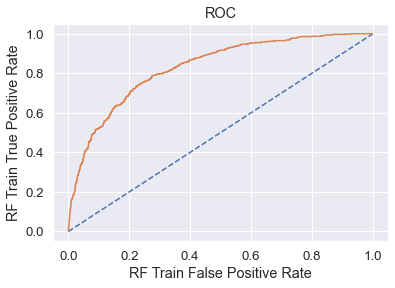

In [50]:
# predict probabilities
probs_rfcl = best_grid_rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_rfcl = probs_rfcl[:, 1]
# calculate AUC
rfcl_train_auc = roc_auc_score(train_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_train_auc)
# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr)
plt.xlabel('RF Train False Positive Rate')
plt.ylabel('RF Train True Positive Rate')
plt.title('ROC')

In [51]:
#Train Data Accuracy
rfcl_train_acc=best_grid_rfcl.score(X_train,train_labels) 
round(rfcl_train_acc,3)

0.791

### Testing Data -Random Forest

Accuracy for RandomForestClassifier model on Testing set is 
 0.752


Classification report for RandomForestClassifier model on Testing set is 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       603
           1       0.69      0.45      0.54       297

    accuracy                           0.75       900
   macro avg       0.73      0.67      0.69       900
weighted avg       0.74      0.75      0.74       900



Confusion Matrix for RandomForestClassifier model on Testing set is


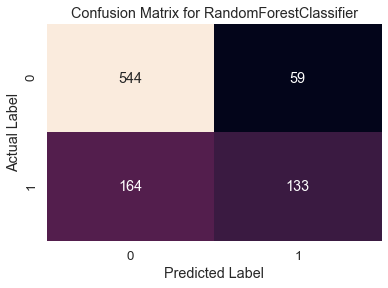

rfcl_test_precision  0.69
rfcl_test_recall  0.45
rfcl_test_f1  0.54


In [52]:
models_names={best_grid_rfcl:'RandomForestClassifier'}

print('Accuracy for {} model on Testing set is'.format(models_names[best_grid_rfcl]),'\n',round(accuracy_score(test_labels,ytest_predict_rfcl),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[best_grid_rfcl]),'\n',classification_report(test_labels,ytest_predict_rfcl))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[best_grid_rfcl]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_rfcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[best_grid_rfcl]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

rfcl_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_f1=round(df.loc["1"][2],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_precision=round(df.loc["1"][0],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

### AUC and ROC for the test data -RF

AUC: 0.819


Text(0.5, 1.0, 'ROC')

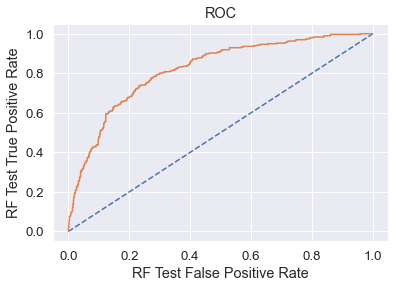

In [53]:
# predict probabilities
probs_rfcl = best_grid_rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_rfcl = probs_rfcl[:, 1]
# calculate AUC
rfcl_test_auc = roc_auc_score(test_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_test_auc)
# calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_labels, probs_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr)
plt.xlabel('RF Test False Positive Rate')
plt.ylabel('RF Test True Positive Rate')
plt.title('ROC')

In [54]:
#Train Data Accuracy
rfcl_test_acc=best_grid_rfcl.score(X_test,test_labels) 
round(rfcl_test_acc,3)

0.752

## Model Evaluation - Artificial Neural Networks

### Training Data -ANN

Accuracy for Neural Network Classifier model on Training set is 
 0.758


Classification report for Neural Network Classifier model on Training set is 
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      1471
           1       0.75      0.28      0.41       627

    accuracy                           0.76      2098
   macro avg       0.75      0.62      0.63      2098
weighted avg       0.76      0.76      0.72      2098



Confusion Matrix for Neural Network Classifier model on Training set is


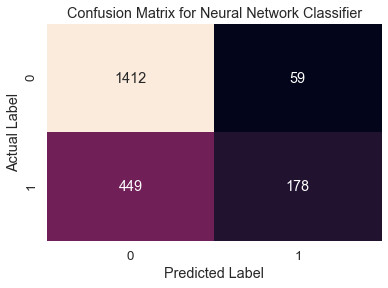

ANN_train_precision  0.75
ANN_train_recall  0.28
ANN_train_f1  0.41


In [55]:
models_names={best_grid_mlp:'Neural Network Classifier'}

print('Accuracy for {} model on Training set is'.format(models_names[best_grid_mlp]),'\n',round(accuracy_score(train_labels,ytrain_predict_mlp),3))
print('\n')
print('Classification report for {} model on Training set is'.format(models_names[best_grid_mlp]),'\n',classification_report(train_labels,ytrain_predict_mlp))
print('\n')
print('Confusion Matrix for {} model on Training set is'.format(models_names[best_grid_mlp]))
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[best_grid_mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

mlp_metrics=classification_report(train_labels, ytrain_predict_mlp,output_dict=True)
df=pd.DataFrame(mlp_metrics).transpose()
ann_train_f1=round(df.loc["1"][2],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_precision=round(df.loc["1"][0],2)
print ('ANN_train_precision ',ann_train_precision)
print ('ANN_train_recall ',ann_train_recall)
print ('ANN_train_f1 ',ann_train_f1)

### AUC and ROC for the training data-ANN

AUC: 0.796


Text(0.5, 1.0, 'ROC')

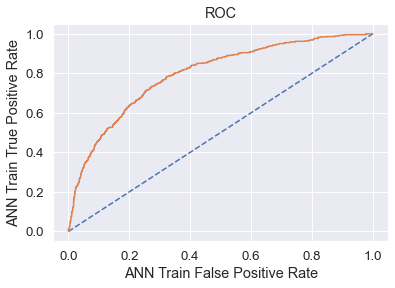

In [56]:
# predict probabilities
probs_ann = best_grid_mlp.predict_proba(Scaled_X_train)
# keep probabilities for the positive outcome only
probs_ann = probs_ann[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(train_labels, probs_ann)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)
plt.xlabel('ANN Train False Positive Rate')
plt.ylabel('ANN Train True Positive Rate')
plt.title('ROC')

In [57]:
#Train Data Accuracy
ann_train_acc=best_grid_mlp.score(Scaled_X_train,train_labels) 
round(ann_train_acc,3)

0.758

### Testing Data - ANN

Accuracy for Neural Network Classifier model on Testing set is 
 0.728


Classification report for Neural Network Classifier model on Testing set is 
               precision    recall  f1-score   support

           0       0.72      0.97      0.83       603
           1       0.78      0.25      0.37       297

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.60       900
weighted avg       0.74      0.73      0.68       900



Confusion Matrix for Neural Network Classifier model on Testing set is


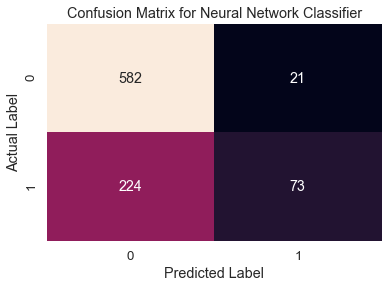

ANN_test_precision  0.78
ANN_test_recall  0.25
ANN_test_f1  0.37


In [58]:
models_names={best_grid_mlp:'Neural Network Classifier'}

print('Accuracy for {} model on Testing set is'.format(models_names[best_grid_mlp]),'\n',round(accuracy_score(test_labels,ytest_predict_mlp),3))
print('\n')
print('Classification report for {} model on Testing set is'.format(models_names[best_grid_mlp]),'\n',classification_report(test_labels,ytest_predict_mlp))
print('\n')
print('Confusion Matrix for {} model on Testing set is'.format(models_names[best_grid_mlp]))
sns.heatmap(confusion_matrix(test_labels,ytest_predict_mlp),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[best_grid_mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

mlp_metrics=classification_report(test_labels, ytest_predict_mlp,output_dict=True)
df=pd.DataFrame(mlp_metrics).transpose()
ann_test_f1=round(df.loc["1"][2],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_precision=round(df.loc["1"][0],2)
print ('ANN_test_precision ',ann_test_precision)
print ('ANN_test_recall ',ann_test_recall)
print ('ANN_test_f1 ',ann_test_f1)

### AUC and ROC for the test data -ANN

AUC: 0.791


Text(0.5, 1.0, 'ROC')

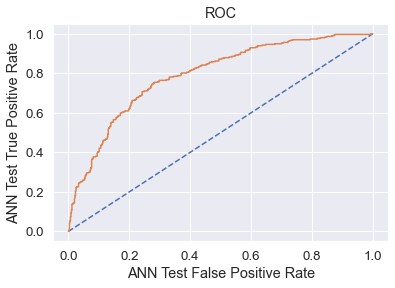

In [59]:
# predict probabilities
probs_ann = best_grid_mlp.predict_proba(Scaled_X_test)
# keep probabilities for the positive outcome only
probs_ann = probs_ann[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(test_labels, probs_ann)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)
plt.xlabel('ANN Test False Positive Rate')
plt.ylabel('ANN Test True Positive Rate')
plt.title('ROC')

In [60]:
#Train Data Accuracy
ann_test_acc=best_grid_mlp.score(Scaled_X_test,test_labels) 
round(ann_test_acc,3)

0.728

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.4	Final Model: Compare all the model and write an inference which model is best/optimized.

In [61]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.81,0.75,0.79,0.75,0.76,0.73
AUC,0.86,0.79,0.83,0.82,0.80,0.79
Recall,0.57,0.47,0.50,0.45,0.28,0.25
Precision,0.74,0.68,0.72,0.69,0.75,0.78
F1 Score,0.64,0.55,0.59,0.54,0.41,0.37


In [62]:
models = [reg_dt_model,best_grid_rfcl,best_grid_mlp]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid_rfcl:'RandomForestClassifier',best_grid_mlp:'ANN'}
for i in range(0,len(models)):
    if models[i]==best_grid_mlp:
        print('Accuracy Score for Train set for{} is {}'.format(models_names[models[i]],
                                                                round(accuracy_score(train_labels,
                                                                                    models[i].predict(Scaled_X_train)),2)))
        print('Accuracy Score for Test set for{} is {}'.format(models_names[models[i]],
                                                                round(accuracy_score(test_labels,
                                                                                    models[i].predict(Scaled_X_test)),2)))
    else:
        print('Accuracy Score for Train set for{} is {}'.format(models_names[models[i]],
                                                                round(accuracy_score(train_labels,
                                                                                    models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for{} is {}'.format(models_names[models[i]],
                                                                round(accuracy_score(test_labels,
                                                                                    models[i].predict(X_test)),2)))

Accuracy Score for Train set forDecisionTreeClassifier is 0.81
Accuracy Score for Test set forDecisionTreeClassifier is 0.75
Accuracy Score for Train set forRandomForestClassifier is 0.79
Accuracy Score for Test set forRandomForestClassifier is 0.75
Accuracy Score for Train set forANN is 0.76
Accuracy Score for Test set forANN is 0.73


## Comparing Confusion Matrices From All the models for train set

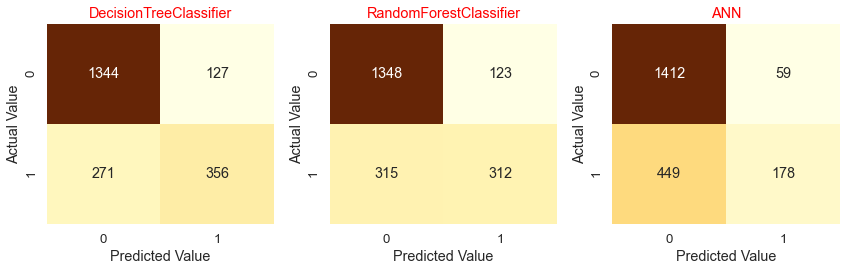

In [63]:
models = [reg_dt_model,best_grid_rfcl,best_grid_mlp]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid_rfcl:'RandomForestClassifier',best_grid_mlp:'ANN'}
fig=plt.figure(figsize=(12,4))
for i in range (0,len(models)):
    ax=fig.add_subplot(1,3,i+1)
    if models[i]==best_grid_mlp:
        sns.heatmap(confusion_matrix(train_labels,models[i].predict(Scaled_X_train)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(train_labels,models[i].predict(X_train)),annot=True,fmt='.0f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
plt.tight_layout()

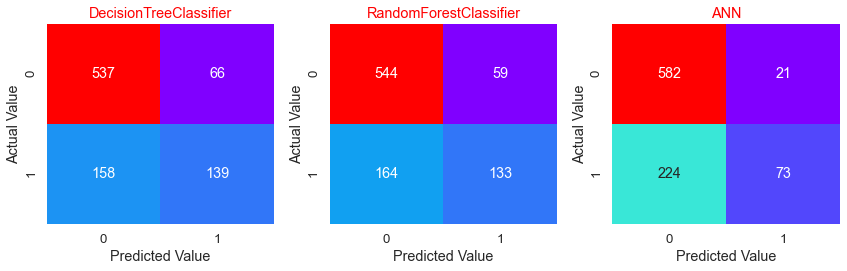

In [64]:
models = [reg_dt_model,best_grid_rfcl,best_grid_mlp]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid_rfcl:'RandomForestClassifier',best_grid_mlp:'ANN'}
fig=plt.figure(figsize=(12,4))
for i in range (0,len(models)):
    ax=fig.add_subplot(1,3,i+1)
    if models[i]==best_grid_mlp:
        sns.heatmap(confusion_matrix(test_labels,models[i].predict(Scaled_X_test)),annot=True,fmt='.0f',cbar=False,cmap='rainbow')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else:
        sns.heatmap(confusion_matrix(test_labels,models[i].predict(X_test)),annot=True,fmt='.0f',cbar=False,cmap='rainbow')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
plt.tight_layout()

## ROC Curve for the 3 models on the Training data

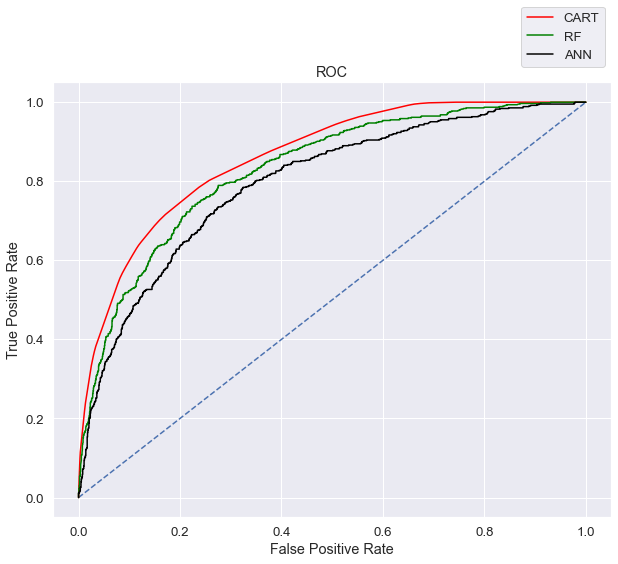

In [65]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

## ROC Curve for the 3 models on the Test 

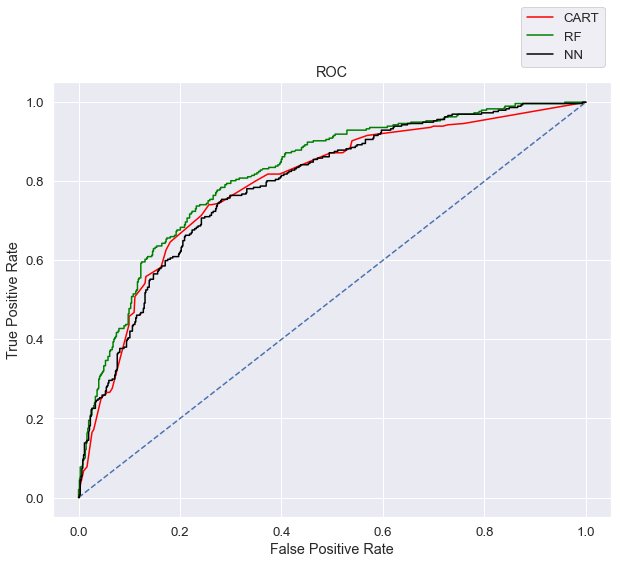

In [66]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

* **Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model**

* **Overall all the 3 models are reasonably stable enough to be used for making any future predictions.**
* **From Cart and Random Forest Model, the variable Agency_code is found to be the most useful feature amongst all other features for predicting if a person has claimed or not. If Claimed is yes, then those customers have more chances of getting tour insurance.**

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.5	Inference: Basis on these predictions, what are the business insights and recommendations.

* **From the above models we know that ‘Agency_code’ feature plays an important role for predictions to be made on the target variable Claimed.**
* **We know that the best model accuracy received was 80%. We need to increase the samples of proportions of 1’s claim frequency in order to increase the model accuracy towards 90% or to a more accurate result.** 
* **With the above 3 models we can certainly decrease the higher claim frequency or the customer who incorrectly claimed tour insurance can be rejected .By doing this we can certainly save enormous amount overflow of cash money for an agency company.** 
